In [12]:
import matplotlib.pyplot as plt
import numpy as np
import collections
import random
import seaborn
import pandas as pd
import math

from numpy.random import choice
from scipy.stats import *

%matplotlib inline

### Задание 1

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов (решение на бумажке и на python).

In [7]:
def get_probality(coin_array):
    return round(collections.Counter(coin_array)[1] / len(coin_array), 2)

print(f'Python: {get_probality(np.random.randint(low=0, high=2, size=15))},\
       Manual: {get_probality(np.array([0, 1, ]))}')

Python: 0.47,       Manual: 0.5


In [33]:
# - Задание 1 - Нужно было воспользоваться формулой Бернулли и посчитать вероятность для всех простых чисел меньше 15, 
# по отдельности (2, 3, 5, 7, 11, 13), и затем сложить вероятности.

n = 15 #число испытаний
p_sum = 0
for _ in [2, 3, 5, 7, 11, 13]:
    p_sum = p_sum + math.factorial(n) / ( math.factorial( _ ) * math.factorial( n - _ ) )        
bernulli = p_sum / 2**n

print(round(bernulli, 2))

0.35


### Задание 2

Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

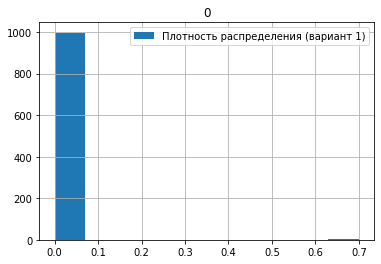

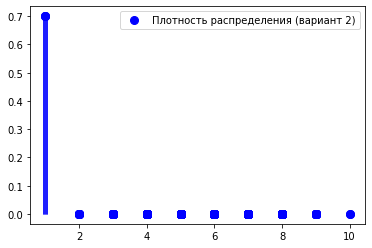

<Figure size 432x288 with 0 Axes>

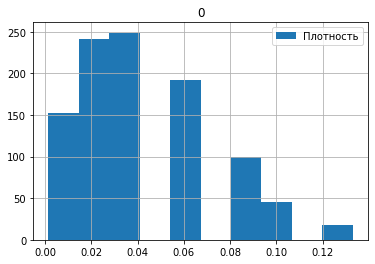

<Figure size 432x288 with 0 Axes>

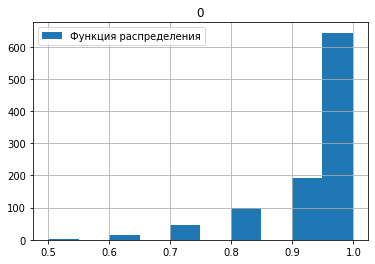

<Figure size 432x288 with 0 Axes>

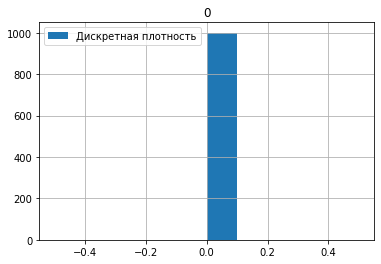

<Figure size 432x288 with 0 Axes>

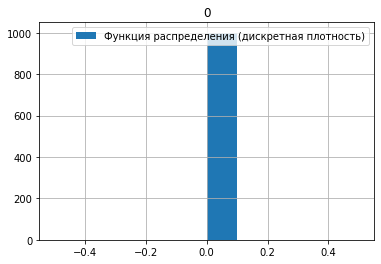

Среднее
5.983
Дисперсия
2.378711
Медиана
6.0


In [4]:
# random_numbers = choice(np.random.random(10), size=1000)
random_numbers = binom.rvs(size=1000, n=10, p=0.6)
p = 0.7

# Плотность распределения
distribution_density_array = np.array([])
for _ in random_numbers:
    distribution_density_array = np.append(distribution_density_array, bernoulli.pmf(_, p))
pd.DataFrame(distribution_density_array).hist(label='Плотность распределения (вариант 1)')
plt.legend()

plt.figure()
plt.plot(random_numbers, bernoulli.pmf(random_numbers, p), 'bo', ms=8, label='Плотность распределения (вариант 2)')
plt.vlines(random_numbers, 0, bernoulli.pmf(random_numbers, p), colors='b', lw=5, alpha=0.5)
plt.legend()

# Плотность
plt.figure()
pd.DataFrame(norm.pdf(random_numbers, loc=1, scale=3)).hist(label='Плотность')
plt.legend()

# Функция распределения
plt.figure()
pd.DataFrame(norm.cdf(random_numbers, loc=1, scale=3)).hist(label='Функция распределения')
plt.legend()

# Дискретная плотность
plt.figure()
pd.DataFrame(binom.pmf(random_numbers, n=1000, p=p)).hist(label='Дискретная плотность')
plt.legend()

# Функция распределения
plt.figure()
pd.DataFrame(binom.cdf(random_numbers, n=1000, p=p)).hist(label='Функция распределения (дискретная плотность)')
plt.legend()

plt.show()

print('Среднее')
print(random_numbers.mean())

print('Дисперсия')
print(random_numbers.var())

print('Медиана')
print(np.median(random_numbers))

### Задание 3

Пусть брошены 3 уравновешенные монеты. Рассмотрим 3 события:

$A_1$ - монеты 1 и 2 упали одной и той же стороной,

$A_2$ - монеты 2 и 3 упали одной и той же стороной,

$A_3$ - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события являются попарно независимыми, но <b>не</b> являются независимыми в совокупности.

In [5]:
# Вероятность для монеты
p_coin = get_probality(np.random.randint(low=0, high=2, size=1000))

# Вероятность для случая
n = 1000
uniques, counts = np.unique(np.random.randint(low=0, high=2, size=(n, 2)), axis=0, return_counts=True)
p_event = round(counts[3] / n, 2)

# Вероятность для всех случаев
n = 1000
uniques, counts = np.unique(np.random.randint(low=0, high=2, size=(n, 3)), axis=0, return_counts=True)
p_all_events = round(counts[7] / n, 2)

print(p_coin, p_event, p_all_events)
display(p_coin == p_event) # попарно независимыми
display(p_coin == p_all_events) # не являются независимыми в совокупности

0.49 0.25 0.11


False

False

### Задание 4 (формула полной вероятности)

В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [6]:
# [1, 0] - продукция 1 предприятия обычного сорта (10%)
# [1, 1] - продукция 1 предприятия ВЫСШЕГО сорта (10%)
# [2, 0] - продукция 2 предприятия обычного сорта (25%)
# [2, 1] - продукция 2 предприятия ВЫСШЕГО сорта (5%)
# [3, 0] - продукция 3 предприятия обычного сорта (30%)
# [3, 1] - продукция 3 предприятия ВЫСШЕГО сорта (20%)

products_list = [[1, 0]] * 10 + [[1, 1]] * 10 + [[2, 0]] * 25 + [[2, 1]] * 5 + [[3, 0]] * 30 + [[3, 1]] * 20
uniques, counts = np.unique(products_list, axis=0, return_counts=True)
p = round((counts[1] + counts[3] + counts[5]) / len(products_list), 2)
p

0.35

In [ ]:
# - Задание 4 - Вероятность = 0.2 * 0.1 + 0.05 * 0.3 + 0.2 * 0.5 = 0.135 = 13.5%